**INITIALIZATION:**
- I use these three lines of code on top of my each notebooks because it will help to prevent any problems while reloading the same project. And the third line of code helps to make visualization within the notebook.

In [1]:
#@ INITIALIZATION: 
%reload_ext autoreload
%autoreload 2
%matplotlib inline

**LIBRARIES AND DEPENDENCIES:**
- I have downloaded all the libraries and dependencies required for the project in one particular cell.

In [10]:
#@ GETTING LIBRARIES AND DEPENDENCIES: 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import manifold
%matplotlib inline

#@ IGNORING WARNINGS: 
import warnings
warnings.filterwarnings("ignore")

**GETTING THE DATASET:**

In [3]:
#@ GETTING THE DATASET: 
data = datasets.fetch_openml("mnist_784",version=1,return_X_y=True)     # Getting the Dataset. 
pixel_values, targets = data                                            # Initializing Features and Targets. 
targets = targets.astype(int)                                           # Converting into Integers. 

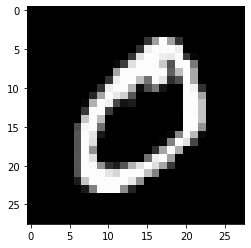

In [5]:
#@ VISUALIZING THE SAMPLES: 
single_image = pixel_values[1, :].reshape(28, 28)                       # Initializing an Image. 
plt.imshow(single_image, cmap="gray");                                  # Visualizing an Image. 

**TSNE DECOMPOSITION:**
- It is a method of visualizing **Unsupervised** dataset. 

In [6]:
#@ INITIALIZING TSNE DECOMPOSITION: 
tsne = manifold.TSNE(n_components=2, random_state=42)           # Initializing TSNE. 
transformed_data = tsne.fit_transform(pixel_values[:3000, :])   # Initializing Transformed Data. 

In [7]:
#@ INITIALIZING PANDAS DATAFRAME: 
tsne_df = pd.DataFrame(                                         # Initializing DataFrame. 
    np.column_stack((transformed_data, targets[:3000])), 
    columns=["x", "y", "targets"])                              # Initializing Columns. 
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)         # Converting into Integers. 
tsne_df.head(3)                                                 # Inspecting DataFrame. 

,x,y,targets
0,-5.281551,-28.952768,5
1,-26.105896,-68.069321,0
2,-42.503582,35.580391,4


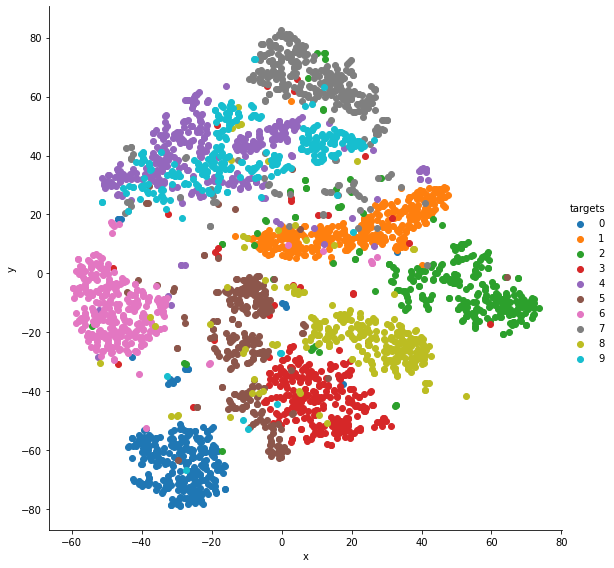

In [11]:
#@ PLOTTING THE TRANSFORMED SAMPLES: 
grid = sns.FacetGrid(tsne_df, hue="targets", size=8)             # Initialization. 
grid.map(plt.scatter, "x", "y").add_legend();                    # Plotting. 

**CROSS VALIDATION:**
- **Cross Validation** is a step in the process of building a machine learning model which helps us to ensure that our models fit the data accurately and also ensures that we do not overfit. 

In [12]:
#@ GETTING THE DATASET: 
PATH = "/content/drive/MyDrive/AAML/winequality-red.csv"   # Path to the Dataset. 
df = pd.read_csv(PATH, low_memory=False)                   # Initializing DataFrame. 
df.head(4)                                                 # Inspecting DataFrame. 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6


In [13]:
#@ PREPARING THE DATASET: 
quality_mapping = {3:0, 4:1, 5:2, 6:3, 7:4, 8:5}           # Initializing Mapping Dictionary. 
df.loc[:, "quality"] = df.quality.map(quality_mapping)     # Mapping Quality Values. 
df.head(4)                                                 # Inspecting DataFrame. 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3


In [14]:
#@ SPLITTING THE DATASET: 
df = df.sample(frac=1).reset_index(drop=True)              # Shuffling the Dataset. 
df_train = df.head(1000)                                   # Initializing Training DataFrame. 
df_test = df.tail(599)                                     # Initializing Test DataFrame. 